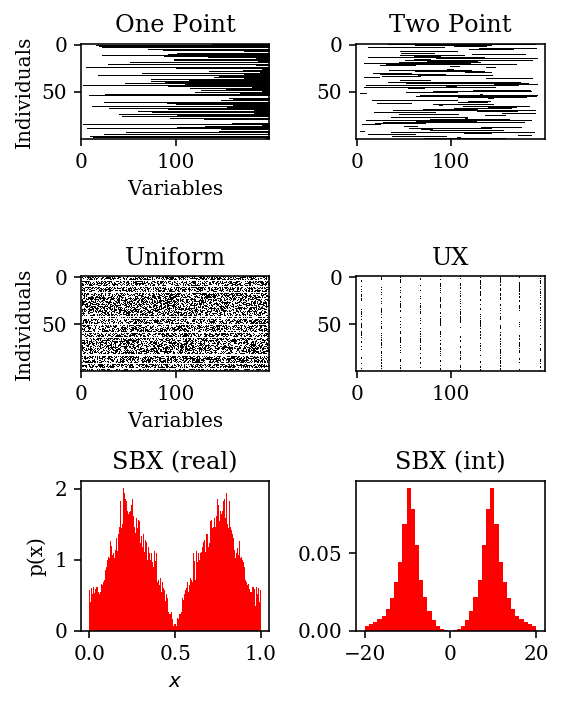

In [36]:
from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt

def example_parents(n_matings, n_var):
    a = np.arange(n_var)[None, :].repeat(n_matings, axis=0)
    b = a + n_var
    return a, b
    

    


plt.rc('font', family='serif')
fig, ax = plt.subplots(3, 2, figsize=(4, 5))




n_matings, n_var = 100, 200
a,b = example_parents(n_matings,n_var)
off = crossover(get_crossover("bin_one_point"), a, b)
b = (off[:n_matings] != a[0])
ax[0][0].imshow(b, cmap='Greys',  interpolation='nearest')
ax[0][0].set_title("One Point")
ax[0][0].set_xlabel("Variables")
ax[0][0].set_ylabel("Individuals")

a,b = example_parents(n_matings,n_var)
off = crossover(get_crossover("bin_two_point"), a, b)
b = (off[:n_matings] != a[0])
ax[0][1].imshow(b, cmap='Greys',  interpolation='nearest')
ax[0][1].set_title("Two Point")


off = crossover(get_crossover("bin_ux"), a, b)
b = (off[:n_matings] != a[0])
ax[1][0].imshow(b, cmap='Greys',  interpolation='nearest')
ax[1][0].set_title("Uniform")
ax[1][0].set_xlabel("Variables")
ax[1][0].set_ylabel("Individuals")


_a = np.full((100,200), False)
_b = np.copy(_a)
_b[:, np.linspace(5, 195, 10).astype(np.int)] = True
b = crossover(get_crossover("bin_hux"), _a, _b)[:100]
ax[1][1].imshow(b, cmap='Greys',  interpolation='nearest')
ax[1][1].set_title("UX")


a,b = np.full((10000, 1), 0.2), np.full((10000, 1), 0.8)
off = crossover(get_crossover("real_sbx", prob=1.0, eta=0.8, prob_per_variable=1.0), a, b)
ax[2][0].hist(off, range=(0,1), bins=200, density=True, color="red")
ax[2][0].set_title("SBX (real)")
ax[2][0].set_xlabel("$x$")
ax[2][0].set_ylabel("p(x)")



a,b = np.full((10000, 1), -10), np.full((10000, 1), +10)
off = crossover(get_crossover("int_sbx", prob=1.0, eta=3, prob_per_variable=1.0), a, b, xl=-20, xu=+20)
ax[2][1].hist(off, range=(-20, 20), bins=41, density=True, color="red")
ax[2][1].set_title("SBX (int)")

fig.tight_layout()
plt.savefig("crossover.pdf")
plt.show()
